<a href="https://colab.research.google.com/github/Shristy2107/Porter-NN-Regression/blob/main/Porter_NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/dataset.csv.zip")

# Display basic information about the dataset
df.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  float64       
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  object        
 5   order_protocol            176248 non-null  float64       
 6   total_items               176248 non-null  int64         
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  int64         
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  float64       
 12  total_b

In [ ]:
df.describe()

In [ ]:
df.shape

(176248, 17)

In [ ]:
# Convert timestamps to datetime format
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

# Extract hour of day and day of the week from order timestamp
df["order_hour"] = df["created_at"].dt.hour
df["order_dayofweek"] = df["created_at"].dt.dayofweek

# Compute delivery time in minutes
df["delivery_time_minutes"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60

# Display updated dataframe with new features
df[["created_at", "actual_delivery_time", "delivery_time_minutes", "order_hour", "order_dayofweek"]].head()


,created_at,actual_delivery_time,delivery_time_minutes,order_hour,order_dayofweek
0,2015-02-06 22:24:17,2015-02-06 23:27:16,62.983333,22,4
1,2015-02-10 21:49:25,2015-02-10 22:56:29,67.066667,21,1
8,2015-02-16 00:11:35,2015-02-16 00:38:01,26.433333,0,0
14,2015-02-12 03:36:46,2015-02-12 04:14:39,37.883333,3,3
15,2015-01-27 02:12:36,2015-01-27 03:02:24,49.800000,2,1


In [ ]:
# Check missing values percentage
missing_values = df.isnull().sum() / len(df) * 100
missing_values[missing_values > 0]


,0


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
categorical_cols = ["store_primary_category", "store_id"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future reference

# Verify encoding
df[categorical_cols].head()


,store_primary_category,store_id
0,4,4959
1,46,5315
8,36,5315
14,38,5279
15,38,5279


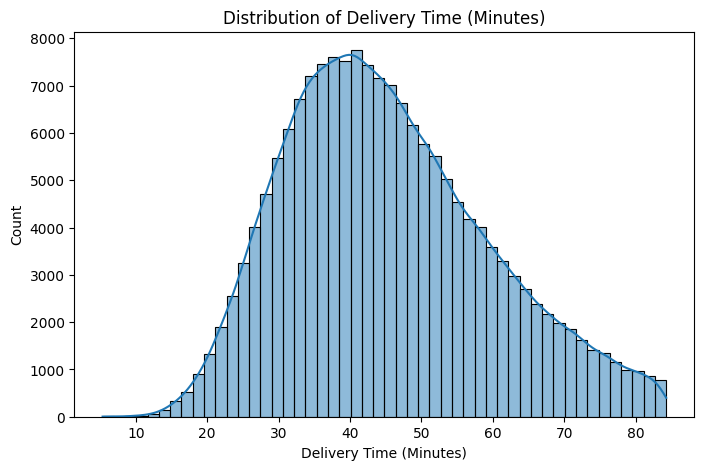

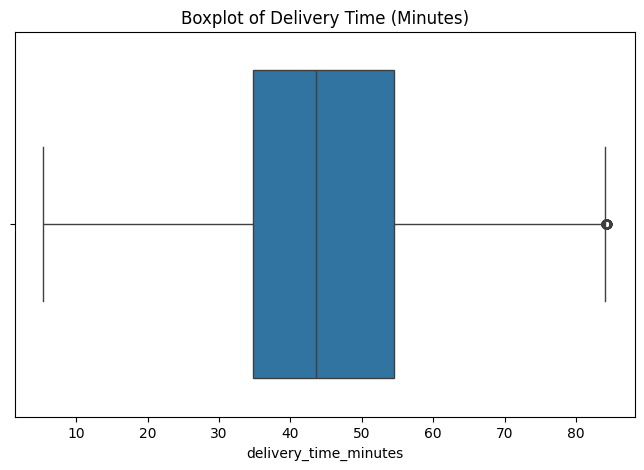

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of delivery time
plt.figure(figsize=(8, 5))
sns.histplot(df["delivery_time_minutes"], bins=50, kde=True)
plt.title("Distribution of Delivery Time (Minutes)")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Count")
plt.show()

# Boxplot for outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["delivery_time_minutes"])
plt.title("Boxplot of Delivery Time (Minutes)")
plt.show()


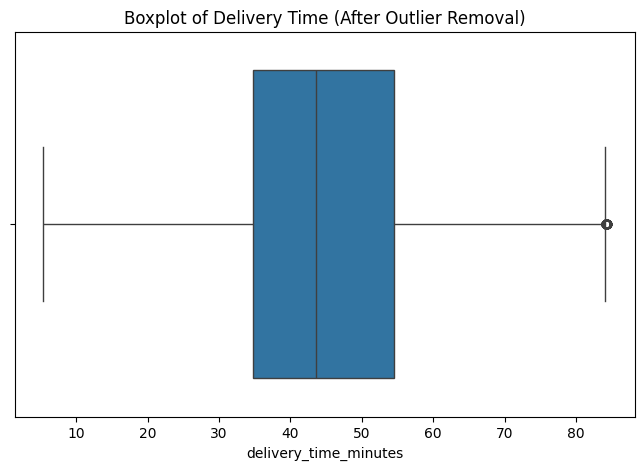

In [ ]:
# Outlier removal using IQR
Q1 = df["delivery_time_minutes"].quantile(0.25)
Q3 = df["delivery_time_minutes"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df["delivery_time_minutes"] >= lower_bound) & (df["delivery_time_minutes"] <= upper_bound)]

# Plot again to check improvement
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["delivery_time_minutes"])
plt.title("Boxplot of Delivery Time (After Outlier Removal)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=["delivery_time_minutes", "created_at", "actual_delivery_time"])
y = df["delivery_time_minutes"]

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((135268, 14), (33817, 14), (135268,), (33817,))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
4228/4228 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 396.0027 - mae: 14.6360 - val_loss: 161.5669 - val_mae: 10.1531
Epoch 2/50
4228/4228 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 162.8074 - mae: 10.1819 - val_loss: 158.4627 - val_mae: 10.0899
Epoch 3/50
4228/4228 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 159.2926 - mae: 10.0711 - val_loss: 157.7028 - val_mae: 10.0477
Epoch 4/50
4228/4228 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 159.0575 - mae: 10.0652 - val_loss: 156.7338 - val_mae: 9.9620
Epoch 5/50
4228/4228 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 158.5057 - mae: 10.0397 - val_loss: 158.1496 - val_mae: 9.9624
Epoch 6/50
4228/4228 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 158.1568 - mae: 10.0298 - val_loss: 156.5893 - val_mae: 9.9678
Epoch 7/50
4228/4228 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 157.3398 - mae: 10.0046 - val_loss: 157.3858 - val_mae: 9.9897
Epoch 8/50
4228/4228 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 157.0638 - mae: 9.9965 - val_loss: 156.1176 - val_mae: 1

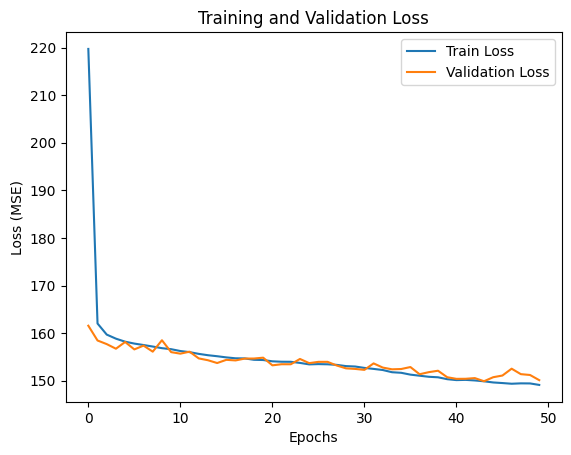

1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 149.4075 - mae: 9.7229
Test MAE: 9.71


In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test MAE: {test_mae:.2f}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Get predictions on test set
y_pred = model.predict(X_test_scaled)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step
Mean Squared Error (MSE): 150.13
Root Mean Squared Error (RMSE): 12.25
Mean Absolute Error (MAE): 9.71
